# P02_01_EDA

In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [3]:
%config InlineBackend.figure_format = 'retina'


In [4]:
from datetime import date
from datetime import datetime

In [5]:
section_fig_main_title = 'P02_01_EDA_'

In [6]:
# !/Users/amin/Desktop/proj/env/bin/python -m pip install matplotlib


In [7]:
csv_path = "../Data/Data_CME.csv"
df = pd.read_csv(csv_path, index_col='TARGET_ARRIVAL [UTC]', parse_dates=True)

In [8]:
# drop the first column
df = df.iloc[: , 1:]

In [9]:
df.head()

,HICAT_ID,SSE_LAUNCH [UTC],TARGET_NAME,ICMECAT_ID,SC_INSITU,ICME_START_TIME [UTC],ARRIVAL_DIFFERENCE [hrs],SC_HELIODISTANCE [AU],SC_LONG_HEEQ [deg],SC_LAT_HEEQ [deg],...,MO_MVA_AXIS_LAT [deg],MO_MVA_RATIO,GSR_START_TIME [UTC],GSR_START_TIME [UTC].1,GSR_AXIS_LONG [deg],GSR_AXIS_LAT [deg],GSR_IMPACT [AU],VHTX [kms-1],VHTY [kms-1],VHTZ [kms-1]
TARGET_ARRIVAL [UTC],,,,,,,,,,,,,,,,,,,,,
2007-05-25 20:06:00,HCME_A__20070521_01,2007-05-21 15:26,VENUS,ICME_VEX_SGOOD_20070525_01,VEX,2007-05-25 03:35,16,0,-53,1,...,53,2,NaN,NaN,0,0,0,9999,9999,9999
2007-05-25 09:26:00,HCME_A__20070521_01,2007-05-21 15:26,MESSENGER,ICME_MES_SGOOD_20070524_01,MESSENGER,2007-05-24 22:45,10,0,-55,-1,...,0,1,NaN,NaN,0,0,0,9999,9999,9999
2007-10-12 09:54:00,HCME_B__20071009_01,2007-10-08 17:47,VENUS,ICME_VEX_SGOOD_20071012_01,VEX,2007-10-12 17:24,-7,0,34,1,...,-18,4,NaN,NaN,0,0,0,9999,9999,9999
2007-11-17 18:18:00,HCME_B__20071115_01,2007-11-14 22:08,VENUS,ICME_VEX_SGOOD_20071117_01,VEX,2007-11-17 07:20,11,0,56,-3,...,67,19,NaN,NaN,0,0,0,9999,9999,9999
2007-12-07 08:34:00,HCME_B__20071204_01,2007-12-04 12:12,VENUS,ICME_VEX_SGOOD_20071207_01,VEX,2007-12-07 18:08,-9,0,69,-3,...,0,1,NaN,NaN,0,0,0,9999,9999,9999


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 143 entries, 2007-05-25 20:06:00 to 2013-12-29 04:45:00
Data columns (total 38 columns):
HICAT_ID                    143 non-null object
SSE_LAUNCH [UTC]            143 non-null object
TARGET_NAME                 143 non-null object
ICMECAT_ID                  143 non-null object
SC_INSITU                   143 non-null object
ICME_START_TIME [UTC]       143 non-null object
ARRIVAL_DIFFERENCE [hrs]    143 non-null int64
SC_HELIODISTANCE [AU]       143 non-null int64
SC_LONG_HEEQ [deg]          143 non-null int64
SC_LAT_HEEQ [deg]           143 non-null int64
SOURCE_TYPE                 81 non-null object
SOURCE_LONG_HEEQ [deg]      143 non-null int64
SOURCE_LAT_HEEQ [deg]       143 non-null int64
FLARE_CLASS                 80 non-null object
FLARE_START_TIME [UTC]      76 non-null object
FLARE_END_TIME [UTC]        76 non-null object
FLARE_PEAK_TIME [UTC]       76 non-null object
CME_SSE_LONG_HEEQ [deg]     143 non-null int64
CME_SS

seperate the columns with dtype int64 

In [11]:
sub_df = df.select_dtypes('int64')
sub_df.head()

,ARRIVAL_DIFFERENCE [hrs],SC_HELIODISTANCE [AU],SC_LONG_HEEQ [deg],SC_LAT_HEEQ [deg],SOURCE_LONG_HEEQ [deg],SOURCE_LAT_HEEQ [deg],CME_SSE_LONG_HEEQ [deg],CME_SSE_LAT_HEEQ [deg],CME_SSE_SPEED [kms-1],CME_TARGET_SPEED [kms-1],...,MO_BZMIN [nT],MO_MVA_AXIS_LONG [deg],MO_MVA_AXIS_LAT [deg],MO_MVA_RATIO,GSR_AXIS_LONG [deg],GSR_AXIS_LAT [deg],GSR_IMPACT [AU],VHTX [kms-1],VHTY [kms-1],VHTZ [kms-1]
TARGET_ARRIVAL [UTC],,,,,,,,,,,,,,,,,,,,,
2007-05-25 20:06:00,16,0,-53,1,0,0,-66,4,306,297,...,-10,96,53,2,0,0,0,9999,9999,9999
2007-05-25 09:26:00,10,0,-55,-1,0,0,-66,4,306,300,...,-9,0,0,1,0,0,0,9999,9999,9999
2007-10-12 09:54:00,-7,0,34,1,25,-5,35,12,342,340,...,-6,173,-18,4,0,0,0,9999,9999,9999
2007-11-17 18:18:00,11,0,56,-3,0,0,50,-22,441,438,...,-8,140,67,19,0,0,0,9999,9999,9999
2007-12-07 08:34:00,-9,0,69,-3,0,0,75,4,446,436,...,-7,0,0,1,0,0,0,9999,9999,9999


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ARRIVAL_DIFFERENCE [hrs],143.0,0.510490,12.052624,-23.0,-9.0,0.0,10.0,23.0
SC_HELIODISTANCE [AU],143.0,0.258741,0.439483,0.0,0.0,0.0,1.0,1.0
SC_LONG_HEEQ [deg],143.0,-8.755245,59.251103,-151.0,-29.0,0.0,0.0,149.0
SC_LAT_HEEQ [deg],143.0,-0.482517,3.667238,-7.0,-3.0,-1.0,2.0,7.0
SOURCE_LONG_HEEQ [deg],143.0,-2.363636,31.020108,-88.0,-2.0,0.0,5.0,89.0
SOURCE_LAT_HEEQ [deg],143.0,1.405594,15.013720,-37.0,0.0,0.0,10.0,40.0
CME_SSE_LONG_HEEQ [deg],143.0,-9.594406,53.563736,-141.0,-27.0,-9.0,20.0,131.0
CME_SSE_LAT_HEEQ [deg],143.0,2.629371,13.518729,-38.0,-5.0,2.0,11.0,40.0
CME_SSE_SPEED [kms-1],143.0,600.132867,368.751572,224.0,373.5,482.0,702.0,2988.0
CME_TARGET_SPEED [kms-1],143.0,544.503497,326.319593,200.0,343.5,438.0,632.0,2639.0


In [13]:
df.isnull().sum() 

HICAT_ID                     0
SSE_LAUNCH [UTC]             0
TARGET_NAME                  0
ICMECAT_ID                   0
SC_INSITU                    0
ICME_START_TIME [UTC]        0
ARRIVAL_DIFFERENCE [hrs]     0
SC_HELIODISTANCE [AU]        0
SC_LONG_HEEQ [deg]           0
SC_LAT_HEEQ [deg]            0
SOURCE_TYPE                 62
SOURCE_LONG_HEEQ [deg]       0
SOURCE_LAT_HEEQ [deg]        0
FLARE_CLASS                 63
FLARE_START_TIME [UTC]      67
FLARE_END_TIME [UTC]        67
FLARE_PEAK_TIME [UTC]       67
CME_SSE_LONG_HEEQ [deg]      0
CME_SSE_LAT_HEEQ [deg]       0
CME_SSE_SPEED [kms-1]        0
CME_TARGET_SPEED [kms-1]     0
MO_START_TIME [UTC]          0
MO_END_TIME [UTC]            0
MO_BMEAN [nT]                0
MO_BSTD [nT]                 0
MO_BZMEAN [nT]               0
MO_BZMIN [nT]                0
MO_MVA_AXIS_LONG [deg]       0
MO_MVA_AXIS_LAT [deg]        0
MO_MVA_RATIO                 0
GSR_START_TIME [UTC]        70
GSR_START_TIME [UTC].1      70
GSR_AXIS

none of numer values have NaN.

In [18]:
# check out the columns name. those with int64 dtype

In [115]:
# df['TARGET_ARRIVAL [UTC]'].head()

In [116]:
# !/Users/amin/Desktop/proj/env/bin/python -m pip install date_converter

In [17]:
# change the dtype of ```TARGET_ARRIVAL [UTC]``` column to date

In [118]:
# df['TARGET_ARRIVAL [UTC]'] = pd.to_datetime(df['TARGET_ARRIVAL [UTC]'])

In [120]:
# df['TARGET_ARRIVAL [UTC]'].head()

In [129]:
# sns.pairplot(sub_df)
# plt.savefig("../Figures/" + section_fig_main_title +"pairplot.png")

In [27]:
# df['CME_TARGET_SPEED [kms-1]'].plot()

In [122]:
sub_df.columns

Index(['ARRIVAL_DIFFERENCE [hrs]', 'SC_HELIODISTANCE [AU]',
       'SC_LONG_HEEQ [deg]', 'SC_LAT_HEEQ [deg]', 'SOURCE_LONG_HEEQ [deg]',
       'SOURCE_LAT_HEEQ [deg]', 'CME_SSE_LONG_HEEQ [deg]',
       'CME_SSE_LAT_HEEQ [deg]', 'CME_SSE_SPEED [kms-1]',
       'CME_TARGET_SPEED [kms-1]', 'MO_BMEAN [nT]', 'MO_BSTD [nT]',
       'MO_BZMEAN [nT]', 'MO_BZMIN [nT]', 'MO_MVA_AXIS_LONG [deg]',
       'MO_MVA_AXIS_LAT [deg]', 'MO_MVA_RATIO', 'GSR_AXIS_LONG [deg]',
       'GSR_AXIS_LAT [deg]', 'GSR_IMPACT [AU]', 'VHTX [kms-1]', 'VHTY [kms-1]',
       'VHTZ [kms-1]'],
      dtype='object')

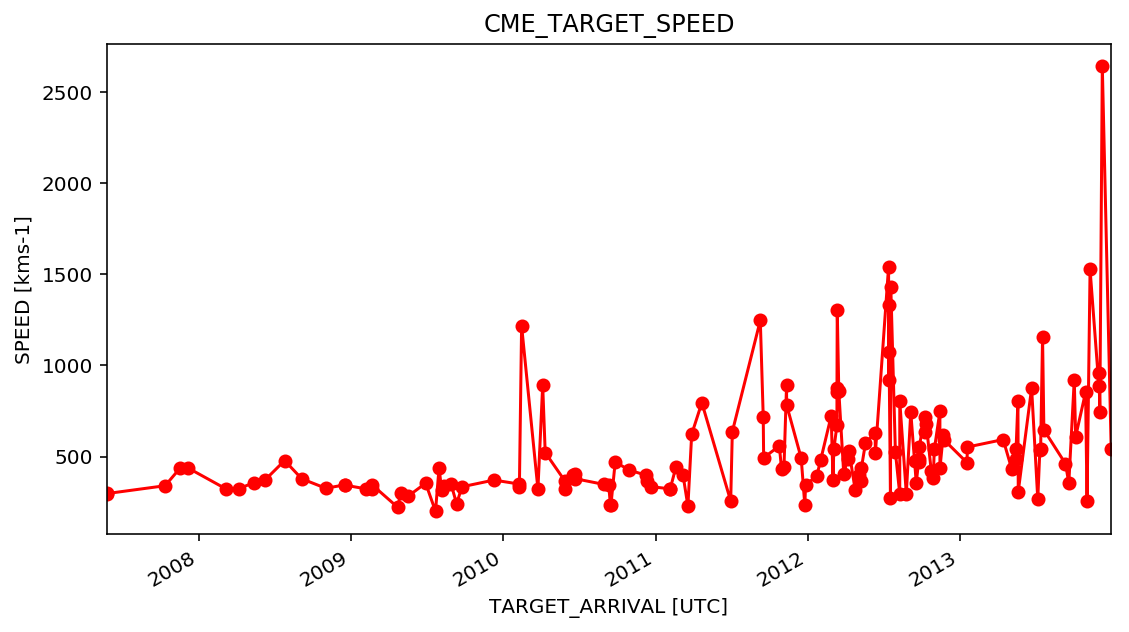

In [124]:
plt.figure(figsize=(9,5))
sub_df["CME_TARGET_SPEED [kms-1]"].plot(style="ro-")

plt.title("CME_TARGET_SPEED")
plt.ylabel("SPEED [kms-1]")
plt.savefig("../Figures/" + section_fig_main_title +"speedVSutc.png")

plt.show()

In [19]:
def plot(colm_1_name, colm_2_name, lab_name, fromm, too, sizee):
    ax = plt.gca()
    sub_df = df[fromm:too]
    sub_df.plot(kind="scatter", 
                x=colm_1_name, y=colm_2_name,
                s=sub_df[lab_name]/sizee, 
                label=lab_name, 
                c=sub_df[lab_name], 
                cmap=plt.get_cmap("jet"),
                colorbar=True,
                alpha=0.4, figsize=(10,7), 
                ax = ax
                )

    plt.legend()
    plt.show()
    plt.tight_layout()

In [20]:
sub_df.columns

Index(['ARRIVAL_DIFFERENCE [hrs]', 'SC_HELIODISTANCE [AU]',
       'SC_LONG_HEEQ [deg]', 'SC_LAT_HEEQ [deg]', 'SOURCE_LONG_HEEQ [deg]',
       'SOURCE_LAT_HEEQ [deg]', 'CME_SSE_LONG_HEEQ [deg]',
       'CME_SSE_LAT_HEEQ [deg]', 'CME_SSE_SPEED [kms-1]',
       'CME_TARGET_SPEED [kms-1]', 'MO_BMEAN [nT]', 'MO_BSTD [nT]',
       'MO_BZMEAN [nT]', 'MO_BZMIN [nT]', 'MO_MVA_AXIS_LONG [deg]',
       'MO_MVA_AXIS_LAT [deg]', 'MO_MVA_RATIO', 'GSR_AXIS_LONG [deg]',
       'GSR_AXIS_LAT [deg]', 'GSR_IMPACT [AU]', 'VHTX [kms-1]', 'VHTY [kms-1]',
       'VHTZ [kms-1]'],
      dtype='object')

In [21]:
len(sub_df)

143

cheking out the corrolation between parameters and make a new df using high corr values.

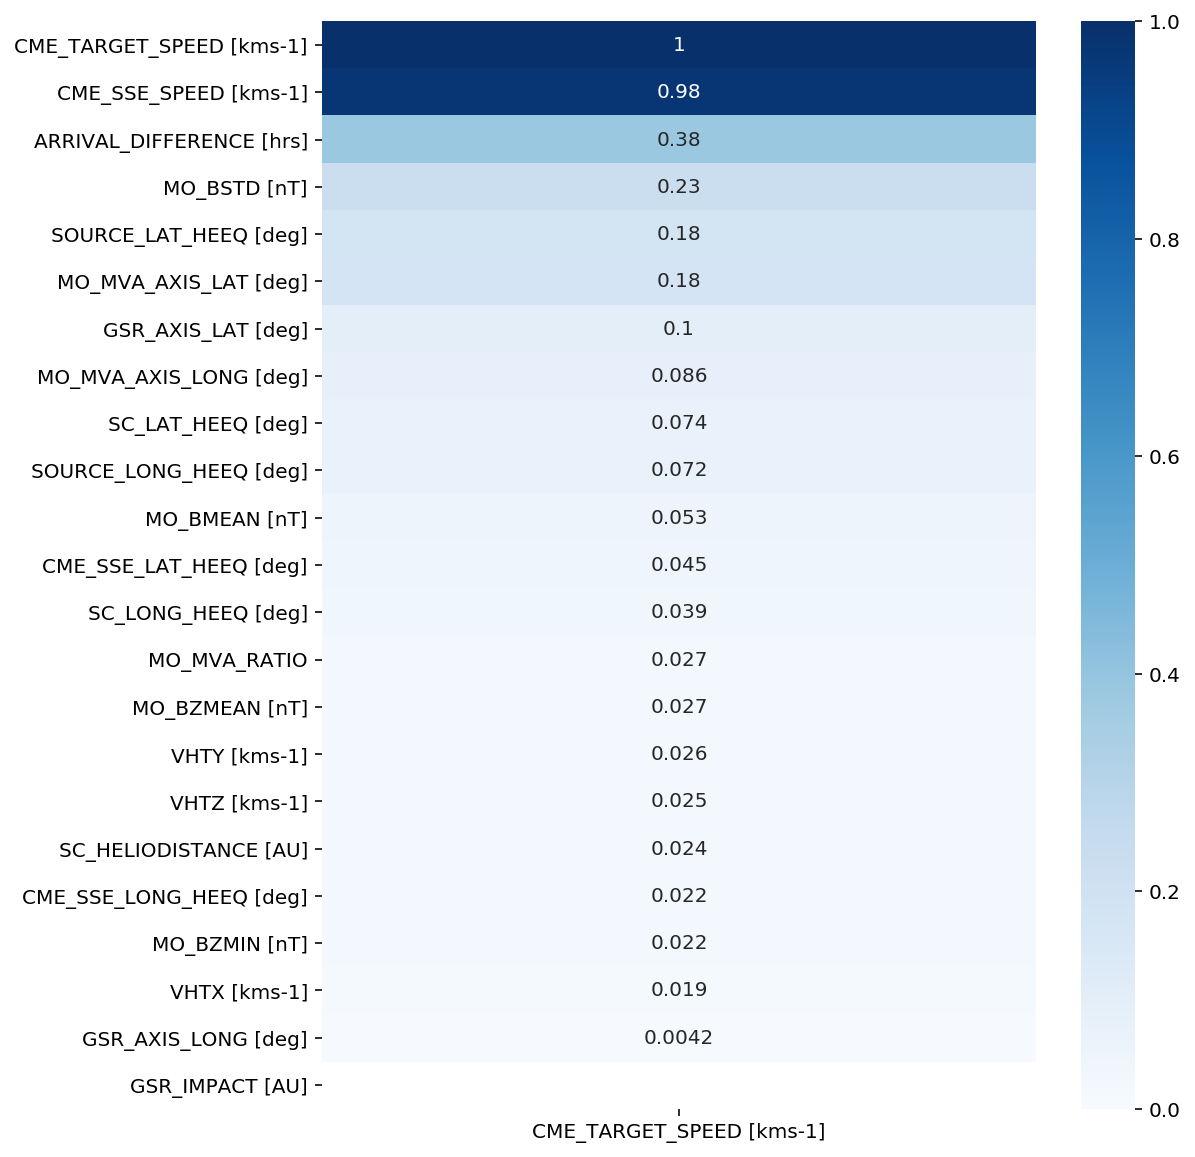

In [96]:
df_corr = sub_df.corr().abs()

#plt.figure(figsize=(6,6))
plt.figure(figsize=(8,10))
sns.heatmap(df_corr[['CME_TARGET_SPEED [kms-1]']].sort_values(by=['CME_TARGET_SPEED [kms-1]'],ascending=False),
            vmin=0,
            cmap='Blues',
            annot=True);
plt.savefig("../Figures/" + section_fig_main_title +"corr_1.png")
plt.show()

In [81]:
df_corr_all = df_corr.sort_values(by=['CME_TARGET_SPEED [kms-1]'],ascending=False)
df_corr_all['CME_TARGET_SPEED [kms-1]'][0:8]

CME_TARGET_SPEED [kms-1]    1.000000
CME_SSE_SPEED [kms-1]       0.977862
ARRIVAL_DIFFERENCE [hrs]    0.383167
MO_BSTD [nT]                0.228795
SOURCE_LAT_HEEQ [deg]       0.183460
MO_MVA_AXIS_LAT [deg]       0.178669
GSR_AXIS_LAT [deg]          0.101606
MO_MVA_AXIS_LONG [deg]      0.085878
Name: CME_TARGET_SPEED [kms-1], dtype: float64

In [82]:
selected_cols = ['CME_SSE_SPEED [kms-1]','ARRIVAL_DIFFERENCE [hrs]',
                'MO_BSTD [nT]','SOURCE_LAT_HEEQ [deg]','MO_MVA_AXIS_LAT [deg]',
                'GSR_AXIS_LAT [deg]','MO_MVA_AXIS_LONG [deg]','CME_TARGET_SPEED [kms-1]']

In [84]:
sub_df_selected = df[selected_cols]
sub_df_selected.head()

,CME_SSE_SPEED [kms-1],ARRIVAL_DIFFERENCE [hrs],MO_BSTD [nT],SOURCE_LAT_HEEQ [deg],MO_MVA_AXIS_LAT [deg],GSR_AXIS_LAT [deg],MO_MVA_AXIS_LONG [deg],CME_TARGET_SPEED [kms-1]
TARGET_ARRIVAL [UTC],,,,,,,,
2007-05-25 20:06:00,306,16,1,0,53,0,96,297
2007-05-25 09:26:00,306,10,0,0,0,0,0,300
2007-10-12 09:54:00,342,-7,1,-5,-18,0,173,340
2007-11-17 18:18:00,441,11,2,0,67,0,140,438
2007-12-07 08:34:00,446,-9,3,0,0,0,0,436


a linear regression model 

In [88]:
lr = LinearRegression()

X = df[['CME_SSE_SPEED [kms-1]','ARRIVAL_DIFFERENCE [hrs]',
                'MO_BSTD [nT]','SOURCE_LAT_HEEQ [deg]','MO_MVA_AXIS_LAT [deg]',
                'GSR_AXIS_LAT [deg]','MO_MVA_AXIS_LONG [deg]']]


y = df['CME_TARGET_SPEED [kms-1]']

lr.fit(X, y)

y_pred = lr.predict(X)

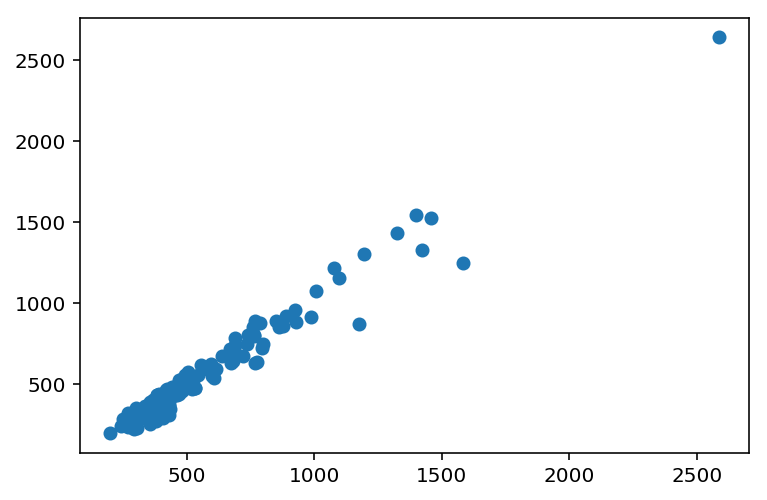

In [89]:
plt.scatter(y_pred, y)

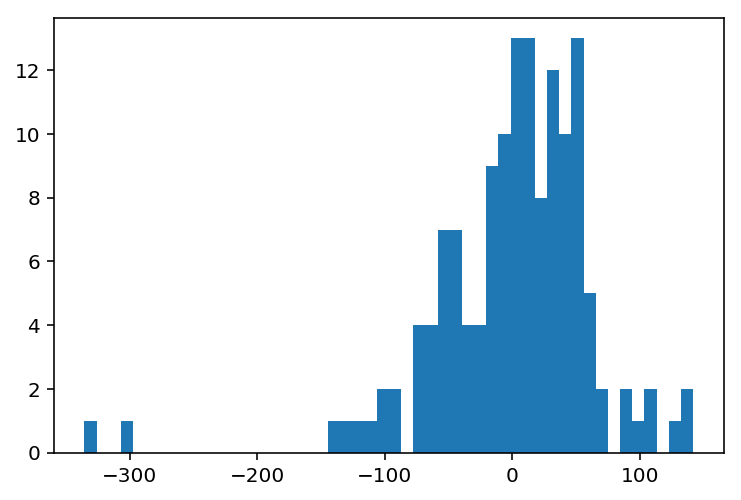

In [90]:
# Creat residuals
resids = y - y_pred
# N assumption:
plt.hist(resids, bins=50);

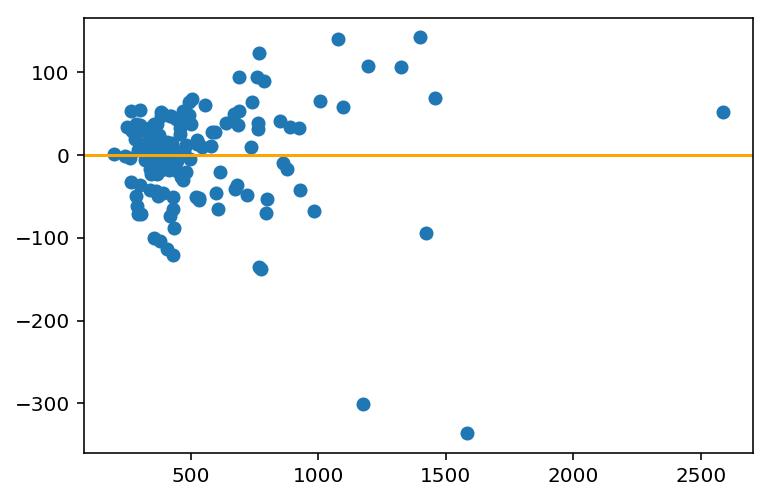

In [91]:
# L and E assumption
# our actual residuals
plt.scatter(y_pred, resids)
plt.axhline(0, color='orange');

In [92]:
lr.score(X, y)

0.9612602036575167

In [93]:
# Via sklearn.metrics
from sklearn import metrics


metrics.mean_absolute_error(y, y_pred)

44.58652788131485

In [94]:
import statsmodels.api as sm

X_sm = sm.add_constant(X)
ols = sm.OLS(y, X_sm).fit()

ols.summary()

/Users/amin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     CME_TARGET_SPEED [kms-1]   R-squared:                       0.961
Model:                                  OLS   Adj. R-squared:                  0.959
Method:                       Least Squares   F-statistic:                     478.5
Date:                      Thu, 21 Oct 2021   Prob (F-statistic):           5.47e-92
Time:                              10:43:21   Log-Likelihood:                -797.63
No. Observations:                       143   AIC:                             1611.
Df Residuals:                           135   BIC:                             1635.
Df Model:                                 7                                         
Covariance Type:                  nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       39.3702     13.431      2.931      0.004      12.809      65.932
CME_SSE_SPEED [kms-1]        0.8437      0.017     50.244      0.000       0.811       0.877
ARRIVAL_DIFFERENCE [hrs]    -1.6621      0.503     -3.306      0.001      -2.656      -0.668
MO_BSTD [nT]                -0.2227      1.824     -0.122      0.903      -3.829       3.384
SOURCE_LAT_HEEQ [deg]       -0.8021      0.384     -2.087      0.039      -1.562      -0.042
MO_MVA_AXIS_LAT [deg]       -0.0725      0.212     -0.342      0.733      -0.492       0.347
GSR_AXIS_LAT [deg]           0.2646      0.252      1.050      0.296      -0.234       0.763
MO_MVA_AXIS_LONG [deg]       0.0063      0.052      0.122      0.903      -0.096       0.109
==============================================================================
Omnibus:                       71.089   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              372.563
Skew:                          -1.712   Prob(JB):                     1.26e-81
Kurtosis:                      10.128   Cond. No.                     1.75e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

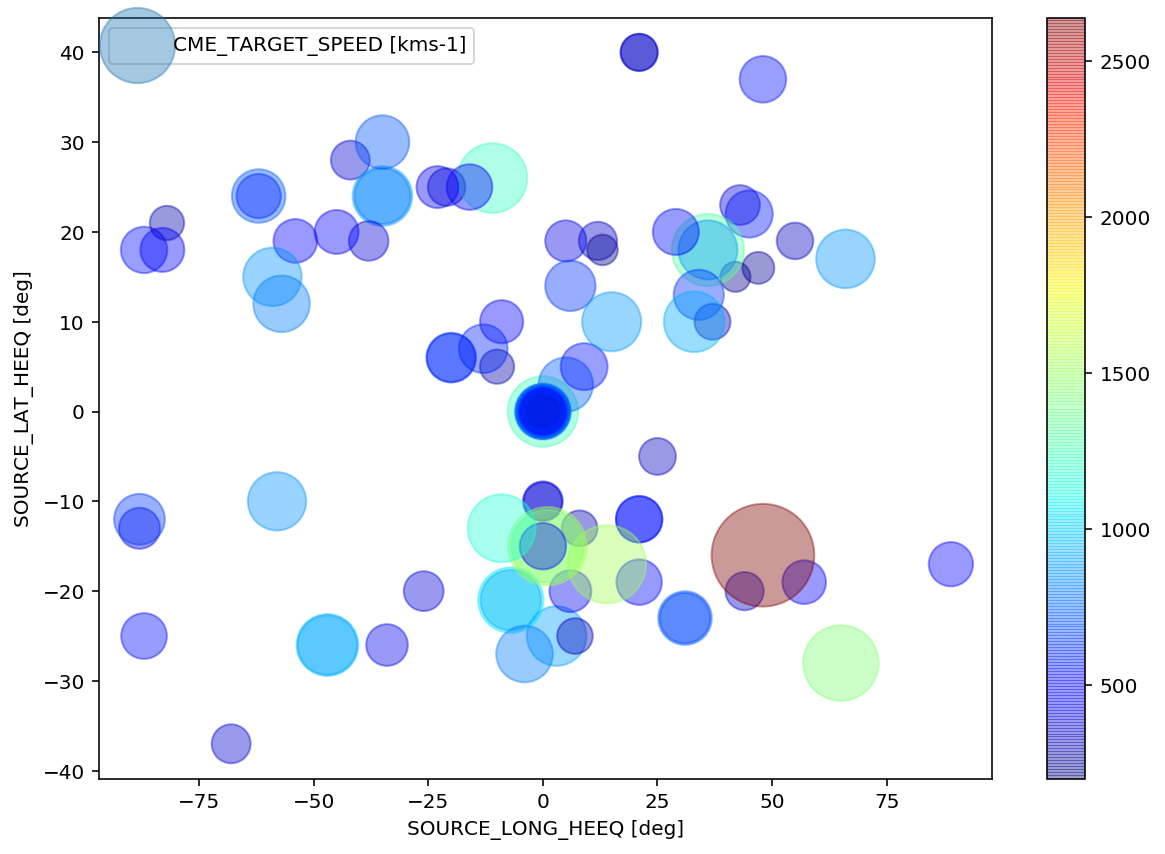

<Figure size 432x288 with 0 Axes>

In [38]:
colm_1_name = 'SOURCE_LONG_HEEQ [deg]'
colm_2_name = 'SOURCE_LAT_HEEQ [deg]'
lab_name = 'CME_TARGET_SPEED [kms-1]'
fromm = 0
too = 143
sizee = 1

plot(colm_1_name, colm_2_name, lab_name, fromm, too, sizee)

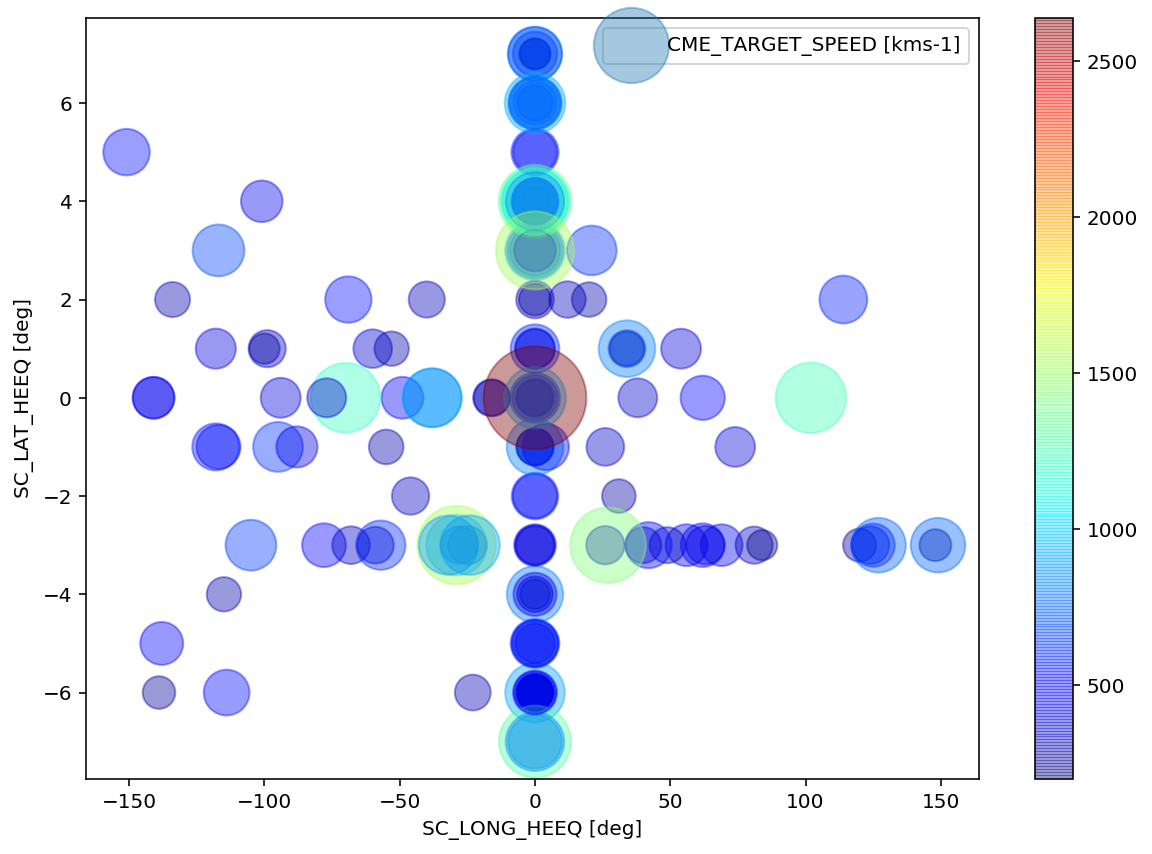

<Figure size 432x288 with 0 Axes>

In [37]:
colm_1_name = 'SC_LONG_HEEQ [deg]'
colm_2_name = 'SC_LAT_HEEQ [deg]'
lab_name = 'CME_TARGET_SPEED [kms-1]'
fromm = 0
too = 143
sizee = 1

plot(colm_1_name, colm_2_name, lab_name, fromm, too, sizee)

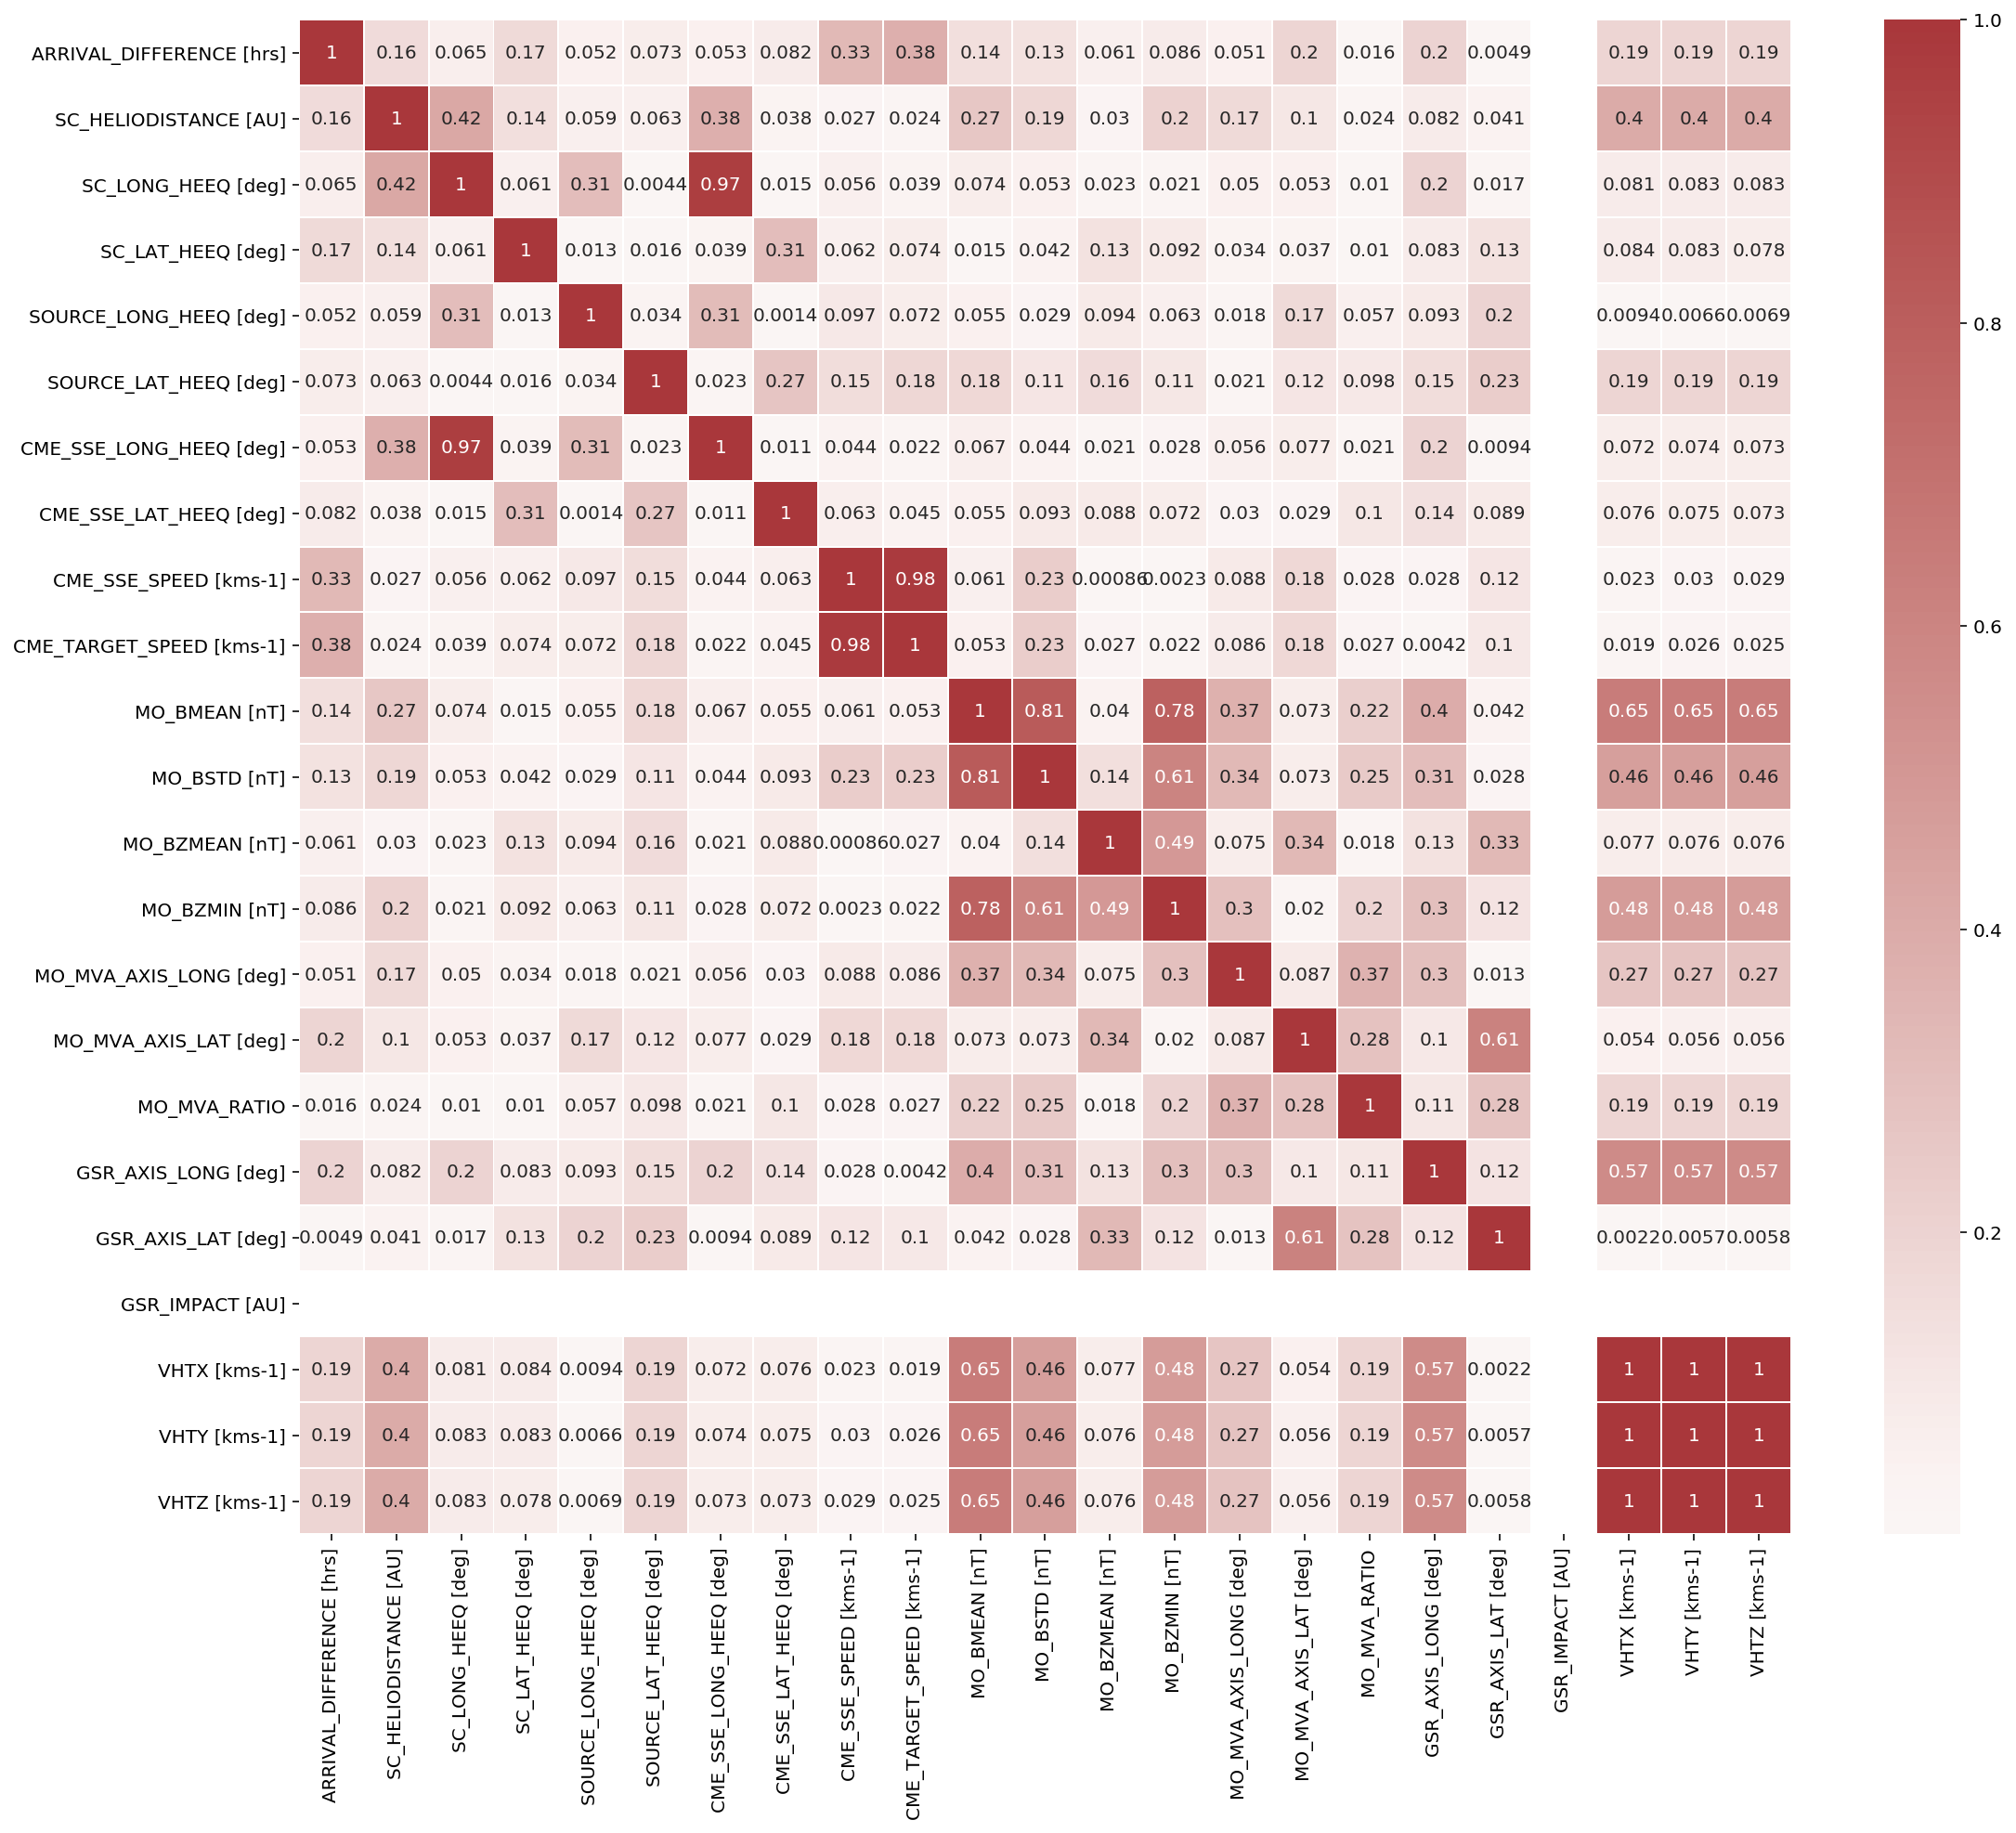

In [65]:
sub_df_corr = sub_df.corr().abs()
plt.figure(figsize=(18,15))

sns.heatmap(sub_df_corr, 
            xticklabels=sub_df_corr.columns,
            yticklabels=sub_df_corr.columns,
            cmap='vlag',
            annot=True,
            linewidth=0.5, center=0,
#             vmin=-0.7, vmax=0.7
           )
plt.savefig("../Figures/" + section_fig_main_title +"corr.png")
plt.show()
